In [1]:
import cv2
import os
from random import shuffle
from tqdm import tqdm
import numpy as np

In [2]:
# generating data for trainig and testing 
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 0
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
#            data for traing
#             file_name_path = "data/"+"Aradhya."+str(img_id)+".jpg"

#data for visualization 
#             file_name_path = "Image for visualization"/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
            
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==500:
                break
                
    cap.release()
    cv2.destroyAllWindows()

    print("Collecting samples is completed !!!")
#generate_dataset()

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-2-8bbda85907b9>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [65]:
#generate_dataset()


In [3]:
def name_list(image_name):
    name = image_name.split('.')[-3] 
    return name

In [4]:
names=[]
for img in tqdm(os.listdir("data")):
    path=os.path.join("data",img)
    names.append(name_list(img))
# shuffle(names)  
   

100%|██████████████████████████████████████████████████████████████████████████| 3540/3540 [00:00<00:00, 353376.88it/s]


In [5]:

names = list(set(names)) 
print(names)


['Ajit', 'arvind', 'Arpit', 'Chandan', 'suraj', 'Nileema', 'Aradhya', 'ruthvik', 'Ankit']


In [6]:
def my_label(image_name):
    l=np.zeros((len(names)), dtype=int)
    name = image_name.split('.')[-3] 
    i = names.index(name)
    l[i]=1
    return l
            

In [7]:
# Create data
import os
from random import shuffle
from tqdm import tqdm


In [8]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (100,100))
        data.append([np.array(img_data), my_label(img)])
#         print(my_label(img))
    shuffle(data)  
    return data

In [9]:
data = my_data()


100%|█████████████████████████████████████████████████████████████████████████████| 3540/3540 [00:03<00:00, 950.87it/s]


In [10]:
train = data[:3100]  
test = data[3100:]
X_train = np.array([i[0] for i in train]).reshape(-1,100,100,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,100,100,1)
print(X_test.shape)
y_test = [i[1] for i in test]

(3100, 100, 100, 1)
(440, 100, 100, 1)


In [11]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression



Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [12]:

# ctf.reset_default_graph()
convnet = input_data(shape=[100,100,1])
convnet = conv_2d(convnet, 64, 5, activation='relu')
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 256, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 512, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 1024, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 2048, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, len(names), activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model = tflearn.DNN(convnet, tensorboard_verbose=1)

In [14]:

model.fit(X_train, y_train, n_epoch=6, validation_set=(X_test, y_test), show_metric = True, run_id="FRS" )

Training Step: 293  | total loss: 0.13077 | time: 266.488s
| Adam | epoch: 006 | loss: 0.13077 - acc: 0.9888 -- iter: 3072/3100
Training Step: 294  | total loss: 0.12012 | time: 273.844s
| Adam | epoch: 006 | loss: 0.12012 - acc: 0.9884 | val_loss: 0.10106 - val_acc: 0.9841 -- iter: 3100/3100
--


In [15]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (100,100))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [16]:
Vdata = data_for_visualization()

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 593.34it/s]


[3.3252436e-06 2.4564153e-09 1.5885855e-06 3.0699325e-06 6.0318337e-07
 1.1424591e-05 7.7335756e-08 1.5524224e-06 9.9997830e-01]
8
[9.9998248e-01 2.6496348e-08 1.4009827e-06 1.3394182e-05 1.3835239e-12
 1.6334253e-06 8.0052155e-07 4.5738799e-09 3.9388379e-07]
0
[9.9997938e-01 3.6069338e-08 1.2097835e-06 1.6647560e-05 1.5097807e-12
 1.6001293e-06 7.8424165e-07 4.6050022e-09 3.9969976e-07]
0
[4.8583092e-06 9.9997544e-01 2.8031202e-06 4.3629789e-06 6.1377776e-08
 1.1195172e-05 1.2204140e-06 9.9378099e-08 4.9209778e-09]
1
[1.1150713e-05 9.9995124e-01 6.7547608e-06 7.5943854e-06 2.8358841e-07
 1.6770889e-05 5.8868386e-06 2.2260744e-07 1.5881303e-08]
1
[1.4393921e-06 4.2776044e-10 5.3029044e-07 9.7026009e-07 1.4021151e-07
 3.5935882e-06 2.0461146e-08 4.4989758e-07 9.9999285e-01]
8
[7.21647441e-01 1.04579255e-02 1.19895954e-02 1.58183977e-01
 2.30648182e-03 2.51525380e-02 5.19267358e-02 6.77157659e-04
 1.76581796e-02]
0
[3.2842170e-08 2.0180388e-13 4.9851792e-08 9.9999952e-01 1.1809119e-13
 8

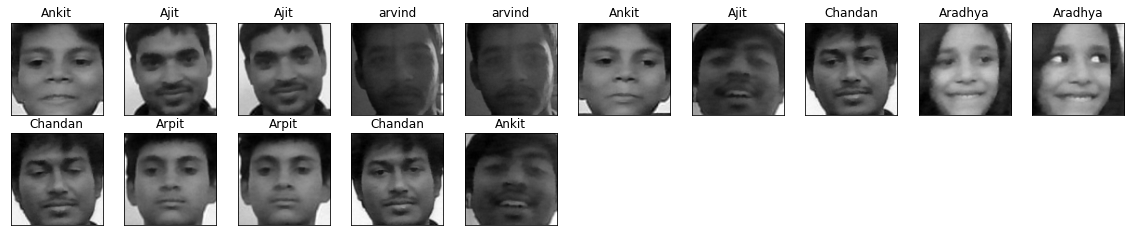

In [17]:
import matplotlib.pyplot as plt   # pip install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:]):
    img_data = data[0]
    y = fig.add_subplot(10,10, num+1)
    image = img_data
    data = img_data.reshape(100,100,1)
    model_out = model.predict([data])[0]
    
#     y = fig.add_subplot(10,10, num+1)
    l=np.argmax(model_out)
    my_label = names[l]
    print(model_out)
    print(l)   
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [18]:
import cv2 
import imageio
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
import numpy as np

In [19]:
print(names)

['Ajit', 'arvind', 'Arpit', 'Chandan', 'suraj', 'Nileema', 'Aradhya', 'ruthvik', 'Ankit']


In [20]:
def faceDetection(test_img):
    gray_img=test_img

    face_haar_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_haar_cascade.detectMultiScale(gray_img,scaleFactor= 1.3,minNeighbors=5)
    return faces, gray_img

In [21]:
def draw_rect(test_img,face):
    (x,y,w,h)=face
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=5)

In [22]:
# Reading group image 7.jpg and detecting faces 

test_img=cv2.imread("7.jpg",0)
faces_detected,gray_img=faceDetection(test_img)
print("face detected",faces_detected)

for (x,y,w,h) in faces_detected:
    draw_rect(test_img,(x,y,w,h))
    pass

cv2.imshow('test image',test_img)

# file_name_path = "detected_face/"+str(1)+'.jpg'
# cv2.imwrite(file_name_path, face)
cv2.waitKey(0)
cv2.destroyAllWindows()

face detected [[800 296 157 157]
 [620 478 107 107]
 [471 584 112 112]
 [316 511 132 132]
 [192 347 117 117]]


In [23]:
# test_img=cv2.imread(r"C:\Users\HP\Desktop\DLCV Project\group_image\6.jpg",0)

# Here we are going to crop the detected faces and save them 

test_img=cv2.imread(r"7.jpg",0)
faces_detected,gray_img=faceDetection(test_img)
print("face detected",faces_detected)
a=0
for face in faces_detected:
    (x,y,w,h)=face

    new=Image.new('RGB',(1100,1100),color='white')
    img=Image.open(r"7.jpg")
''    
    img1=img.crop(box=(x,y,x+w,y+h))

    
    img1.save("104"+"_"+str(a)+".jpg")
    a+=1


face detected [[620 478 107 107]
 [800 296 157 157]
 [316 511 132 132]
 [471 584 112 112]
 [192 347 117 117]]


# Here I copy all detected face and paste the image in "Images_for_visualization1" folder

In [24]:
# again we are going to read the all detected face data

def data_for_visualization1():
    Vdata1 = []
    for img in tqdm(os.listdir("Images_for_visualization1")):
        path = os.path.join("Images_for_visualization1", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (100,100))
        Vdata1.append([np.array(img_data), img_num])
    shuffle(Vdata1)
    return Vdata1

In [25]:
Vdata1 = data_for_visualization1()
# print(Vdata1)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 840.51it/s]


[4.0920172e-06 2.1392443e-08 1.3812601e-05 6.4002197e-06 4.6667578e-03
 4.0749801e-04 1.8267119e-06 2.0296393e-05 9.9487925e-01]
8
[1.5451071e-05 1.5630318e-08 3.0815721e-05 9.9987125e-01 6.4254082e-09
 4.3318647e-05 3.0705876e-06 1.4137404e-06 3.4591616e-05]
3
[2.6097624e-11 1.3231009e-18 2.1198661e-10 2.4854353e-12 1.5496075e-11
 5.1380700e-10 1.0000000e+00 9.7176183e-16 9.5146753e-13]
6
[1.4428525e-03 2.4376454e-06 5.1868910e-01 4.6576539e-01 9.6108179e-06
 4.2353407e-03 8.1683313e-03 5.2129175e-04 1.1657083e-03]
2
[2.1452273e-04 3.3319299e-07 5.3306972e-04 2.4465902e-04 7.6313758e-01
 1.1166270e-03 2.3363012e-01 1.3509904e-05 1.1095959e-03]
4


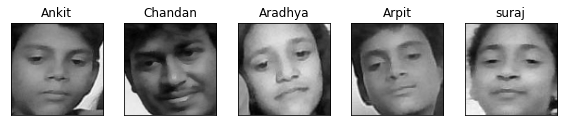

In [26]:
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata1[:len(faces_detected)]):
    img_data = data[0]
    y = fig.add_subplot(10,10, num+1)
    image = img_data
    data = img_data.reshape(100,100,1)
    model_out = model.predict([data])[0]
    
    l=np.argmax(model_out)
    my_label = names[l]
    print(model_out)
    print(l)   
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()